In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


In [19]:
# 1. Data Loading and Cleaning

data = pd.read_excel("C:\SpringBoard\Waste_Management_Project\Dataset\Dataset.xlsx")

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:3: SyntaxWarning: invalid escape sequence '\S'
C:\Users\athar\AppData\Local\Temp\ipykernel_25784\1892877669.py:3: SyntaxWarning: invalid escape sequence '\S'
  data = pd.read_excel("C:\SpringBoard\Waste_Management_Project\Dataset\Dataset.xlsx")


In [20]:
# Handle missing values (replace with mean)
imputer = SimpleImputer(strategy='mean')
data[['inductive_property', 'capacitive_property', 'moisture_property', 'infrared_property']] = imputer.fit_transform(data[['inductive_property', 'capacitive_property', 'moisture_property', 'infrared_property']])

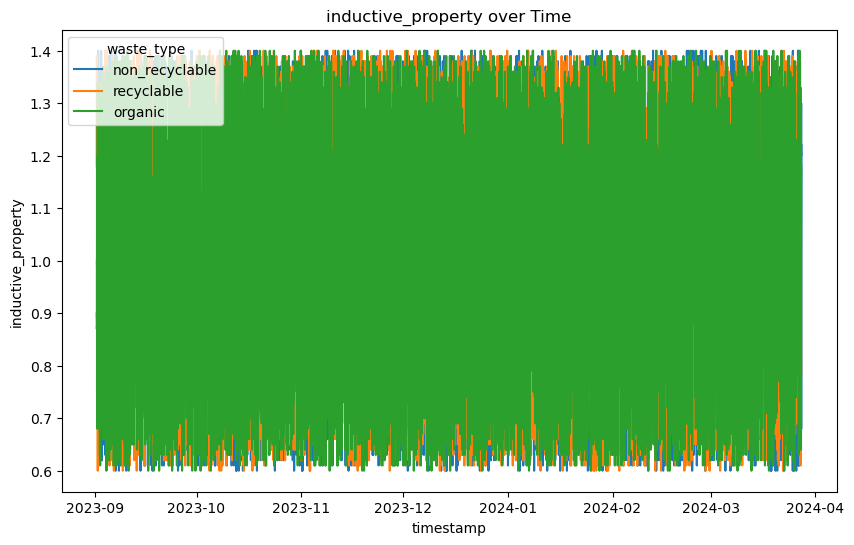

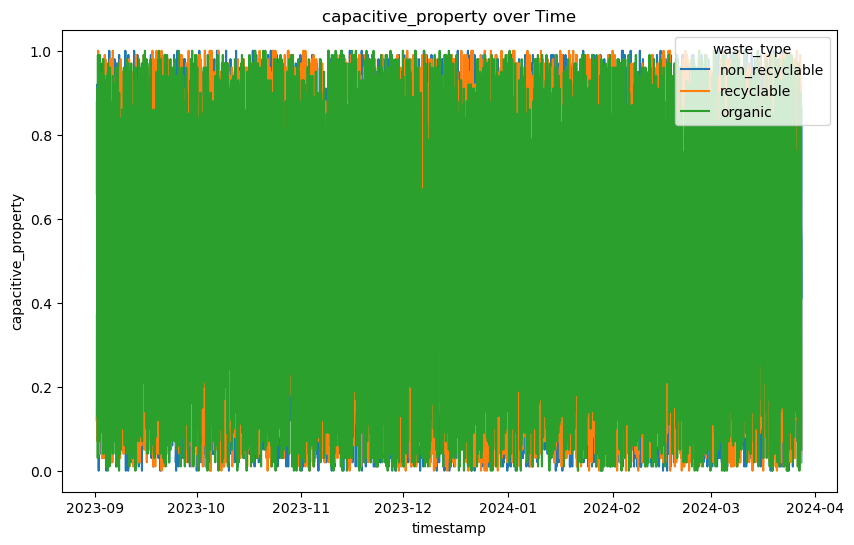

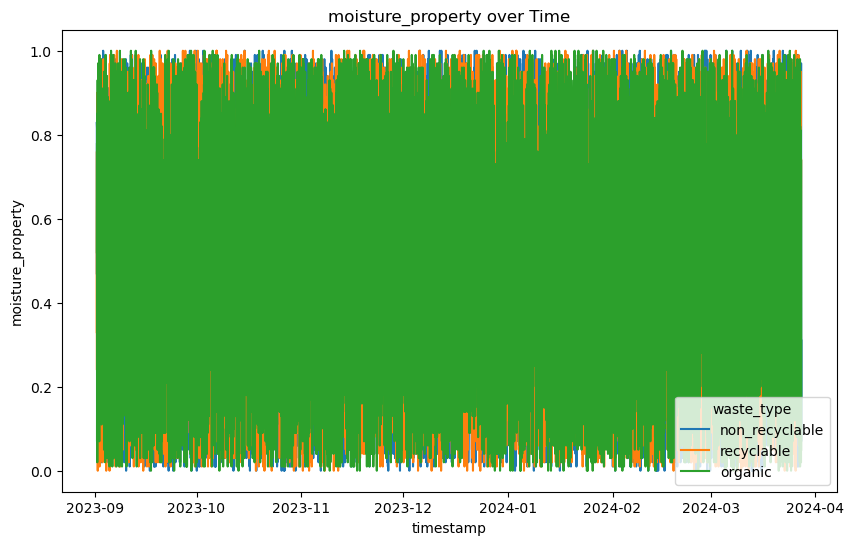

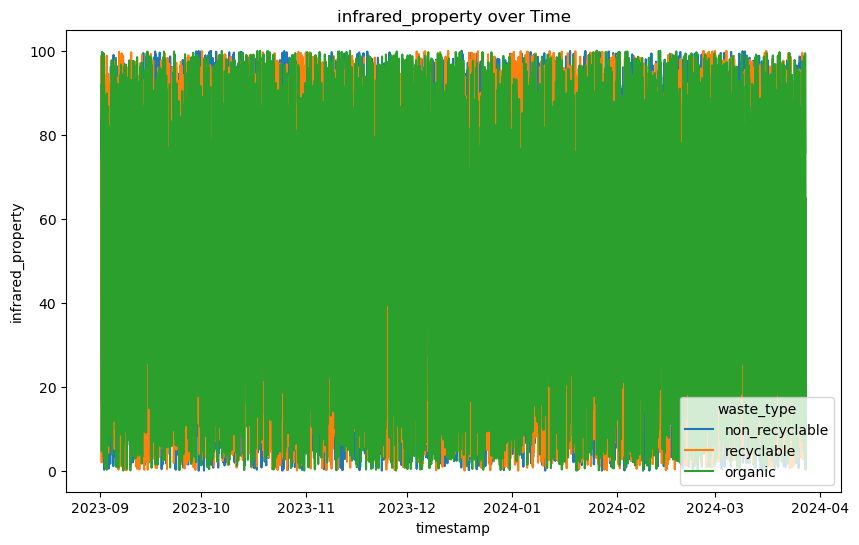

In [21]:
# 2. Visualization

# Time series plots for each property
for property_name in ['inductive_property', 'capacitive_property', 'moisture_property', 'infrared_property']:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='timestamp', y=property_name, hue='waste_type', data=data)
    plt.title(f'{property_name} over Time')
    plt.show()

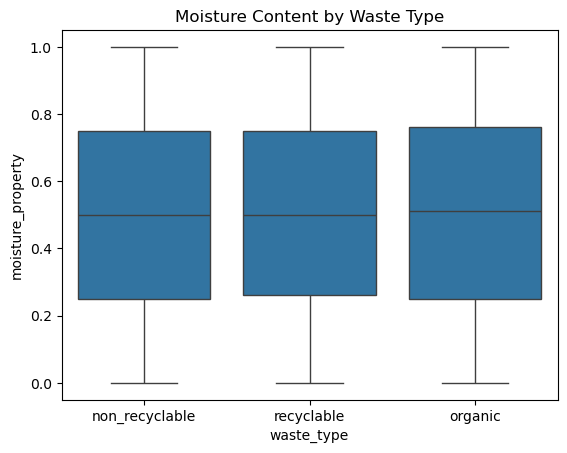

In [22]:
# Box plots to compare properties across waste types
sns.boxplot(x='waste_type', y='moisture_property', data=data)
plt.title('Moisture Content by Waste Type')
plt.show()


In [23]:
# 3. Statistics

data.describe()

,sensor_id,timestamp,inductive_property,capacitive_property,moisture_property,infrared_property
count,20000.000000,20000,20000.000000,20000.000000,20000.000000,20000.000000
mean,2.495900,2023-12-14 15:52:30,1.003058,0.501873,0.501766,50.180508
min,1.000000,2023-09-01 12:00:00,0.600000,0.000000,0.000000,0.010000
25%,2.000000,2023-10-23 13:56:15,0.810000,0.250000,0.250000,25.337500
50%,2.000000,2023-12-14 15:52:30,1.000000,0.510000,0.500000,50.090000
75%,3.000000,2024-02-04 17:48:45,1.200000,0.750000,0.750000,74.972500
max,4.000000,2024-03-27 19:45:00,1.400000,1.000000,1.000000,100.000000
std,1.115188,NaN,0.230327,0.288173,0.288086,28.836594


In [24]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

label_encoder = LabelEncoder()
data['waste_type'] = label_encoder.fit_transform(data['waste_type'])

In [25]:
# 4. Correlation Analysis

correlation_matrix = data.corr()
print(correlation_matrix)



                     sensor_id  timestamp  waste_type  inductive_property  \
sensor_id             1.000000  -0.002979    0.001539           -0.004961   
timestamp            -0.002979   1.000000   -0.001824            0.007923   
waste_type            0.001539  -0.001824    1.000000            0.008682   
inductive_property   -0.004961   0.007923    0.008682            1.000000   
capacitive_property   0.002373  -0.006849   -0.005859           -0.013723   
moisture_property     0.001820   0.007203    0.003430            0.013900   
infrared_property     0.006201  -0.006769    0.003189            0.003220   

                     capacitive_property  moisture_property  infrared_property  
sensor_id                       0.002373           0.001820           0.006201  
timestamp                      -0.006849           0.007203          -0.006769  
waste_type                     -0.005859           0.003430           0.003189  
inductive_property             -0.013723           0.013900

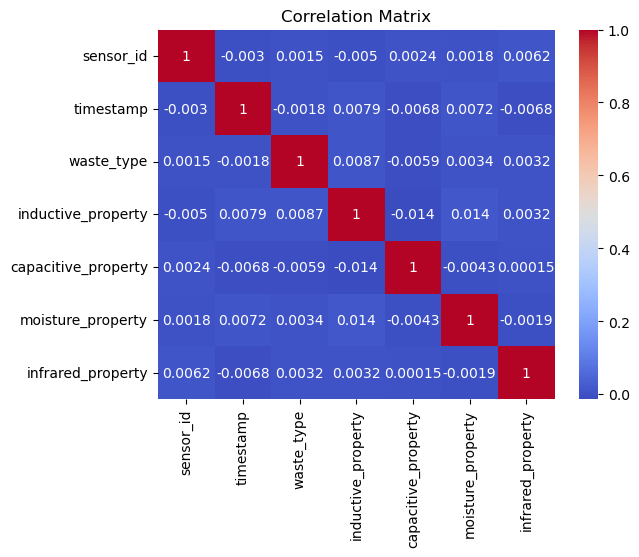

In [26]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [27]:
# 5. Feature Engineering

data['moisture_to_inductive'] = data['moisture_property'] / data['inductive_property']

In [28]:
# 6. Predictive Modeling with Random Forest

X = data[['inductive_property', 'capacitive_property', 'moisture_property', 'infrared_property', 'moisture_to_inductive']]
y = data['waste_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# 7. Hyperparameter Tuning

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

In [30]:
# 8. Evaluation

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.33125
Precision: 0.331208302952258
Recall: 0.33125
F1-score: 0.330964008641527
